In [1]:
import warnings 
warnings.filterwarnings("ignore")


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Importing important libraries

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Data_for_UCI_named.csv")

Reading the data and checking for first 5 rows 

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


The dataset is made up of 10000 rows and 14 columns with two initial target columns("stab" and "stabf"), 13 numerical columns with an exception of the target's column. 

In [6]:
df.isnull().any()

tau1     False
tau2     False
tau3     False
tau4     False
p1       False
p2       False
p3       False
p4       False
g1       False
g2       False
g3       False
g4       False
stab     False
stabf    False
dtype: bool

There are no null/missing values in the dataset

In [7]:
df2= df.drop("stab", axis = 1)

Dropping 'stab' column as per instructions since they have a direct relationship with each other.

In [8]:
df2.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [9]:
features_df= df2.drop(columns="stabf",axis=1)
target_df= df2["stabf"]
#selecting my features' and targets columns 

In [10]:
features_df.head(1)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.95906,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034


Now lets encode the targets' column to binary

In [11]:
target_df = target_df.replace(('stable',"unstable"),(1,0))

In [12]:
#to check
target_df.head(3)

0    0
1    1
2    0
Name: stabf, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features_df,target_df, test_size= 0.2 , random_state= 1 )
y_train.value_counts()

0    5092
1    2908
Name: stabf, dtype: int64

Splitted into training and testing data using 80-20 split. Let's check the shape to conform.

In [14]:
for i in x_train, x_test, y_train, y_test :
    print (i.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [16]:
scaler = StandardScaler()
normalised_train_df =scaler.fit_transform(x_train)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train.columns)
normalised_train_df.head(3)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489


In [17]:
x_test = x_test.reset_index(drop= True )
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df,columns=x_test.columns)
normalised_test_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.003624,0.008925,0.004725,0.005117,-0.005933,0.017393,-0.001908,-0.005060,0.017733,-0.001821,-0.006140,-0.001881
std,0.997149,1.002851,1.018405,1.017444,0.959399,1.004086,0.988196,0.982523,0.992727,0.994921,1.005976,1.000541
min,-1.724672,-1.731129,-1.736170,-1.736448,-2.619307,-1.729690,-1.727025,-1.726221,-1.724767,-1.728238,-1.733900,-1.731687
25%,-0.878676,-0.853428,-0.867250,-0.892263,-0.708106,-0.835049,-0.840422,-0.872239,-0.819387,-0.850990,-0.891766,-0.866510
50%,-0.007089,0.015413,-0.003663,0.014107,0.009351,0.049515,-0.009830,0.020193,0.030278,-0.001660,-0.024394,-0.002679
75%,0.883349,0.895100,0.880731,0.894275,0.662627,0.854933,0.842121,0.827634,0.884737,0.865569,0.864847,0.868777
max,1.729505,1.734690,1.738641,1.738868,2.738530,1.734044,1.726844,1.724487,1.731585,1.727448,1.732750,1.730824


Scaled the x_train and x_test using Standard scaler . Let's start trianing the models

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=1)
model.fit(normalised_train_df,y_train)
new_prediction= model.predict(normalised_test_df)


#accuracy of XGBClassifier
accuracy = accuracy_score(y_test, new_prediction)
print( 'Accuracy: {}' .format(accuracy))

[15:32:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9455


In [20]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=1)

model.fit(normalised_train_df, y_train)
 
# Predicting the Target variable
pred = model.predict(normalised_test_df)
print(classification_report(y_test,pred))
accuracy = accuracy_score(y_test,pred)
accuracy

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1288
           1       0.93      0.90      0.91       712

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



0.9395

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
forest.fit(normalised_train_df, y_train)
pred2 = forest.predict(normalised_test_df)


print(classification_report(y_test,pred2))
print('Accuracy :',accuracy_score(y_test, pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1288
           1       0.93      0.87      0.90       712

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Accuracy : 0.9295


Random Forest Classifier model with an accuracy of 0.9295

In [22]:
#criterion = entropy, gini. Removed estimators=100 and criterion

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
classify = ExtraTreesClassifier()
model3 = classify.fit(normalised_train_df, y_train)
y_pred= classify.predict(normalised_test_df)

print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1288
           1       0.96      0.82      0.89       712

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.93      0.92      0.92      2000



0.9245

Getting the most an dleast important features using extra trees clasifier, and also accuracy score

In [24]:
feature_importance = classify.feature_importances_
normalized_feat_imp = np.std([tree.feature_importances_ for tree in classify.estimators_],axis=0)

In [25]:
normalized_feat_imp

array([0.00849618, 0.00781138, 0.00784483, 0.00737227, 0.00357261,
       0.00342243, 0.00425292, 0.00405073, 0.00563857, 0.00557401,
       0.00720446, 0.00734609])

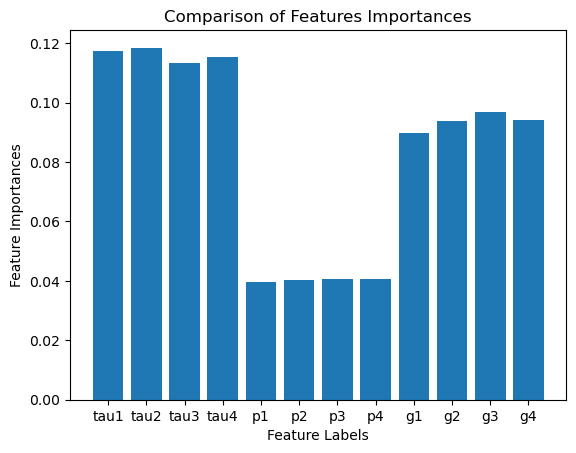

In [28]:
#plotting
plt.bar(features_df.columns,feature_importance)
plt.xlabel("Feature Labels")
plt.ylabel("Feature Importances")
plt.title("Comparison of Features Importances")
plt.show()

From the graph above, the most,least important features are tau2,p1 respectively. 

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
#training a new extratrees model with new hyperparameters model

In [40]:
new_class = ExtraTreesClassifier()
parameters = { 'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }
search= RandomizedSearchCV(new_class,random_state=1,param_distributions = parameters)
search.fit(normalised_train_df,y_train)
pred2= search.predict(normalised_test_df)

print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1288
           1       0.96      0.82      0.89       712

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.93      0.92      0.92      2000



0.9245

There is no change in the accuracy metrics even after using RandomizedsearchCV